In [1]:
#Load in democracy dataset first
import pandas as pd

# Load the excel file
rep_gov_IDEA = pd.read_excel('Representative_Government_IDEA.xlsx')

# Display the first few rows of the DataFrame
print(rep_gov_IDEA.head())

   Year Country name  Representative Government Score  \
0  2021  Afghanistan                             0.00   
1  2021      Albania                             0.64   
2  2021      Algeria                             0.37   
3  2021       Angola                             0.42   
4  2021    Argentina                             0.87   

   Fundamental Rights Score  Checks on Government Score  \
0                      0.31                        0.24   
1                      0.69                        0.58   
2                      0.51                        0.44   
3                      0.49                        0.44   
4                      0.62                        0.65   

   Impartial Adminstration Score  Total Democracy Index  
0                           0.49                 0.2600  
1                           0.36                 0.5675  
2                           0.39                 0.4275  
3                           0.44                 0.4475  
4           

In [5]:
import pandas as pd

# List of file names
file_names = ['Important_in_life_Family.xls', 'Important_in_life_Friends.xls', 'Important_in_life_Leisure_time.xls', 
              'Important_in_life_Politics.xls', 'Important_in_life_Work.xls', 'Important_in_life_Religion.xls']

# Column names for the transposed DataFrame
column_names = ['Very important', 'Rather important', 'Not very important', 
                'Not at all important', "Don't know", "No answer", 'Other or missing']

# Empty DataFrame to merge everything into
merged_df = pd.DataFrame()

# Loop through all the files
for file in file_names:
    # Get the belief name from the file name
    belief_name = file.split('_')[-1].split('.')[0]  # this will give us 'Family', 'Friends', etc.
    
    # Read the Excel file, skipping the first 6 rows
    df = pd.read_excel(file, skiprows=6)
    
    # Scale the columns
    df.loc[:7, df.columns[2:]] = df.loc[:7, df.columns[2:]] / 100
    
    # Drop the first two columns and 8th row
    df = df.drop(df.columns[[0, 1]], axis=1)
    df = df.drop(df.index[7])
    
    # Transpose the DataFrame
    df_T = df.transpose()
    
    # Reset the index
    df_T.reset_index(inplace=True)
    
    # Modify column names to include the belief name
    modified_column_names = [belief_name + '_' + col_name for col_name in column_names]
    
    # Rename the columns
    df_T.columns = ['Country name'] + modified_column_names
    
    # Merge with the main DataFrame
    if merged_df.empty:
        merged_df = df_T
    else:
        merged_df = pd.merge(merged_df, df_T, on='Country name')

# Merge the final DataFrame with rep_gov_IDEA
merged_df = pd.merge(merged_df, rep_gov_IDEA,  how='inner', left_on=['Country name'], 
                     right_on = ['Country name'])

# Print the merged DataFrame
print(merged_df)

       Country name  Family_Very important  Family_Rather important  \
0           Albania                  0.974                    0.019   
1        Azerbaijan                  0.907                    0.084   
2         Argentina                  0.917                    0.082   
3         Australia                  0.902                    0.074   
4           Austria                  0.823                    0.138   
..              ...                    ...                      ...   
73          Ukraine                  0.850                    0.130   
74  North Macedonia                  0.946                    0.037   
75            Egypt                  0.997                    0.003   
76          Uruguay                  0.914                    0.078   
77        Venezuela                  0.834                    0.157   

    Family_Not very important  Family_Not at all important  Family_Don't know  \
0                       0.003                        0.000        

In [9]:
#Creation of a testing set for the MLR
from sklearn.model_selection import train_test_split

# Define predictor variables and outcome variable
X = merged_df[['Family_Very important', 'Family_Rather important', 'Family_Not very important', 
               'Family_Not at all important', "Family_Don't know", 'Family_No answer',
               'Family_Other or missing',
               'Friends_Very important', 'Friends_Rather important', 'Friends_Not very important',
               'Friends_Not at all important', "Friends_Don't know", 'Friends_No answer',
               'Friends_Other or missing',
               'time_Very important', 'time_Rather important', 'time_Not very important',
               'time_Not at all important', "time_Don't know", 'time_No answer',
               'time_Other or missing',
               'Politics_Very important', 'Politics_Rather important', 'Politics_Not very important',
               'Politics_Not at all important', "Politics_Don't know", 'Politics_No answer',
               'Politics_Other or missing',
               'Work_Very important', 'Work_Rather important', 'Work_Not very important',
               'Work_Not at all important', "Work_Don't know", 'Work_No answer',
               'Work_Other or missing',
               'Religion_Very important', 'Religion_Rather important', 'Religion_Not very important',
               'Religion_Not at all important', "Religion_Don't know", 'Religion_No answer',
               'Religion_Other or missing']]
y = merged_df['Total Democracy Index']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#Training the data
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model object
regression_model = LinearRegression()

# Fit the model to the training data
regression_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regression_model.predict(X_test)

LinearRegression()

In [15]:
#Statistical testing of model
from sklearn import metrics
import numpy as np

# Calculate R^2
r2 = metrics.r2_score(y_test, y_pred)
print('R^2:', r2)

# Calculate Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

R^2: 0.04846134621294895
Mean Squared Error: 0.043830899705942644
Root Mean Squared Error: 0.2093583046022838


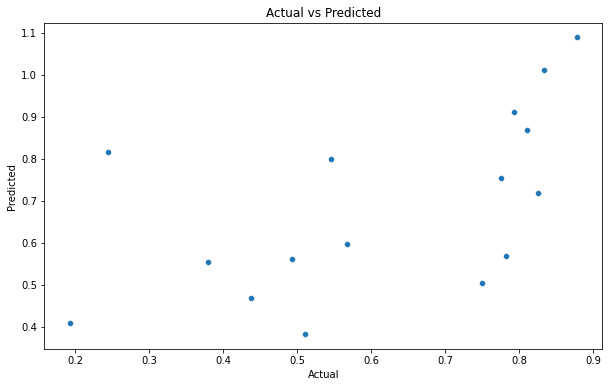

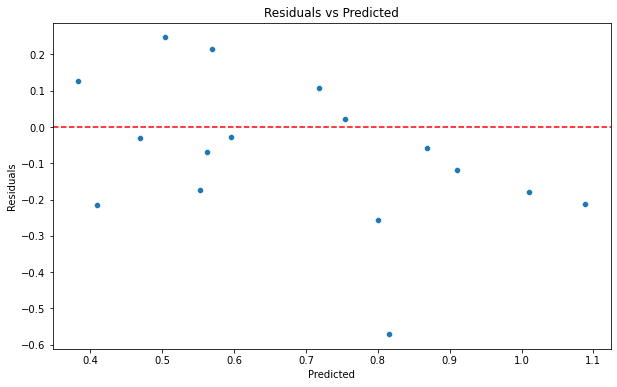

In [12]:
#Visualization of model performance
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Make predictions on the test data
y_pred = regression_model.predict(X_test)

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

In [22]:

# Print the intercept and coefficients
print("Intercept: ", regression_model.intercept_)
print("Coefficients: ", regression_model.coef_)

# Create a dataframe of predictors and coefficients
coeff_df = pd.DataFrame(regression_model.coef_, X.columns, columns=['Coefficient'])  
print(coeff_df)



Intercept:  1.1281533358486149
Coefficients:  [-4.00389570e+01 -4.10075595e+01 -3.44244426e+01 -3.77759307e+01
 -8.73753356e+01 -4.09926015e+01 -9.36729808e+01  4.01831107e+01
  3.98525200e+01  4.14015536e+01  3.10019458e+01  3.60394169e+01
  2.86401401e+01  9.80284417e+01  4.20810457e+01  4.24381710e+01
  4.08829503e+01  4.27663006e+01  5.45317741e+01  6.82624431e+01
 -3.90645454e+01 -2.85036926e+00 -2.48919884e+00 -3.05494968e+00
 -2.06256066e+00 -1.29626672e+01 -1.10799344e+01  4.82705895e+00
 -4.07529536e+01 -4.01292778e+01 -4.31597001e+01 -3.81845555e+01
 -4.14202396e+01 -4.04609214e+01 -5.97674838e+01  9.35889300e-01
  1.05514203e-01  1.78517979e+00  4.76748203e-02  7.15078949e+00
 -6.29444404e+00  8.04930264e+01]
                               Coefficient
Family_Very important           -40.038957
Family_Rather important         -41.007560
Family_Not very important       -34.424443
Family_Not at all important     -37.775931
Family_Don't know               -87.375336
Family_No an

In [27]:
#I think what may be happening is that values with lower amounts of data, such as Don't Know, No Answer or Other
#Or missing might be skewing results. Therefore, I am going to create a second MLR removing those columns and
#then determing the performance.
# Define the columns again, but exclude the "Don't know", "No answer", and "Other or missing" columns
columns = ['Family_Very important', 'Family_Rather important', 'Family_Not very important', 
           'Family_Not at all important',
           'Friends_Very important', 'Friends_Rather important', 'Friends_Not very important',
           'Friends_Not at all important',
           'time_Very important', 'time_Rather important', 'time_Not very important',
           'time_Not at all important',
           'Politics_Very important', 'Politics_Rather important', 'Politics_Not very important',
           'Politics_Not at all important',
           'Work_Very important', 'Work_Rather important', 'Work_Not very important',
           'Work_Not at all important',
           'Religion_Very important', 'Religion_Rather important', 'Religion_Not very important',
           'Religion_Not at all important']

# Redefine predictors and outcome variable based on the trimmed dataset
X_trimmed = trimmed_df[columns]
y_trimmed = trimmed_df['Total Democracy Index']

# Split the dataset into training and test sets
X_train_trimmed, X_test_trimmed, y_train_trimmed, y_test_trimmed = train_test_split(X_trimmed, y_trimmed, test_size=0.2, random_state=42)

# Fit the model to the training data
regression_model_trimmed = LinearRegression()
regression_model_trimmed.fit(X_train_trimmed, y_train_trimmed)

# Print the intercept and coefficients
print("Intercept: ", regression_model_trimmed.intercept_)
print("Coefficients: ", regression_model_trimmed.coef_)

# Create a dataframe of predictors and coefficients
coeff_df_trimmed = pd.DataFrame(regression_model_trimmed.coef_, X_trimmed.columns, columns=['Coefficient'])  
print(coeff_df_trimmed)

#should not at all important metric have a very different regression from very important?

Intercept:  0.789976418145513
Coefficients:  [ -0.37762261  -1.22906687  10.00987944 -17.75528228   9.85510693
   9.37176972  10.45252287   5.11415161 -17.62675488 -17.74262678
 -18.1242047  -17.9970946    6.38208113   7.01964581   6.8356418
   7.0223288   -1.20037862  -0.97857579  -3.49993101   1.2094572
   2.67642712   2.55503357   2.92445246   2.67864453]
                               Coefficient
Family_Very important            -0.377623
Family_Rather important          -1.229067
Family_Not very important        10.009879
Family_Not at all important     -17.755282
Friends_Very important            9.855107
Friends_Rather important          9.371770
Friends_Not very important       10.452523
Friends_Not at all important      5.114152
time_Very important             -17.626755
time_Rather important           -17.742627
time_Not very important         -18.124205
time_Not at all important       -17.997095
Politics_Very important           6.382081
Politics_Rather important         7.0